In [37]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import graphviz
data=pd.read_csv("titanic-passengers.csv" ,sep=';')
data
import numpy as np

In [38]:
data['Age'].fillna(data['Age'].mean(),inplace=True)
encoder = LabelEncoder()
data.drop(['Ticket','Cabin','Embarked'],inplace=True,axis=1)
data.dropna(how='any',inplace=True)
data['Sex'] = encoder.fit_transform(data['Sex'])

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
dtypes: float64(2), int32(1), int64(4), object(2)
memory usage: 66.1+ KB


In [40]:
x=data[	['Pclass','Sex',	'Age','Parch','Fare']]
y = data[['Survived']]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=40)

#applying tree algorithm
tree_decision = tree.DecisionTreeClassifier()  
tree_decision.fit(x_train, y_train)   #fitting our model
y_pred=tree_decision.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8100558659217877


[Text(546.0444140625, 1058.5894736842106, 'Sex <= 0.5\ngini = 0.471\nsamples = 100.0%\nvalue = [0.619, 0.381]'),
 Text(260.1675, 1001.3684210526317, 'Pclass <= 2.5\ngini = 0.361\nsamples = 34.4%\nvalue = [0.237, 0.763]'),
 Text(44.64, 944.1473684210526, 'Age <= 2.5\ngini = 0.084\nsamples = 19.2%\nvalue = [0.044, 0.956]'),
 Text(22.32, 886.9263157894737, 'Pclass <= 1.5\ngini = 0.5\nsamples = 0.3%\nvalue = [0.5, 0.5]'),
 Text(11.16, 829.7052631578947, 'gini = 0.0\nsamples = 0.1%\nvalue = [1.0, 0.0]'),
 Text(33.480000000000004, 829.7052631578947, 'gini = 0.0\nsamples = 0.1%\nvalue = [0.0, 1.0]'),
 Text(66.96000000000001, 886.9263157894737, 'Fare <= 26.125\ngini = 0.071\nsamples = 19.0%\nvalue = [0.037, 0.963]'),
 Text(55.8, 829.7052631578947, 'Fare <= 12.825\ngini = 0.198\nsamples = 6.3%\nvalue = [0.111, 0.889]'),
 Text(44.64, 772.4842105263158, 'gini = 0.0\nsamples = 1.1%\nvalue = [0.0, 1.0]'),
 Text(66.96000000000001, 772.4842105263158, 'Age <= 23.5\ngini = 0.234\nsamples = 5.2%\nvalue 

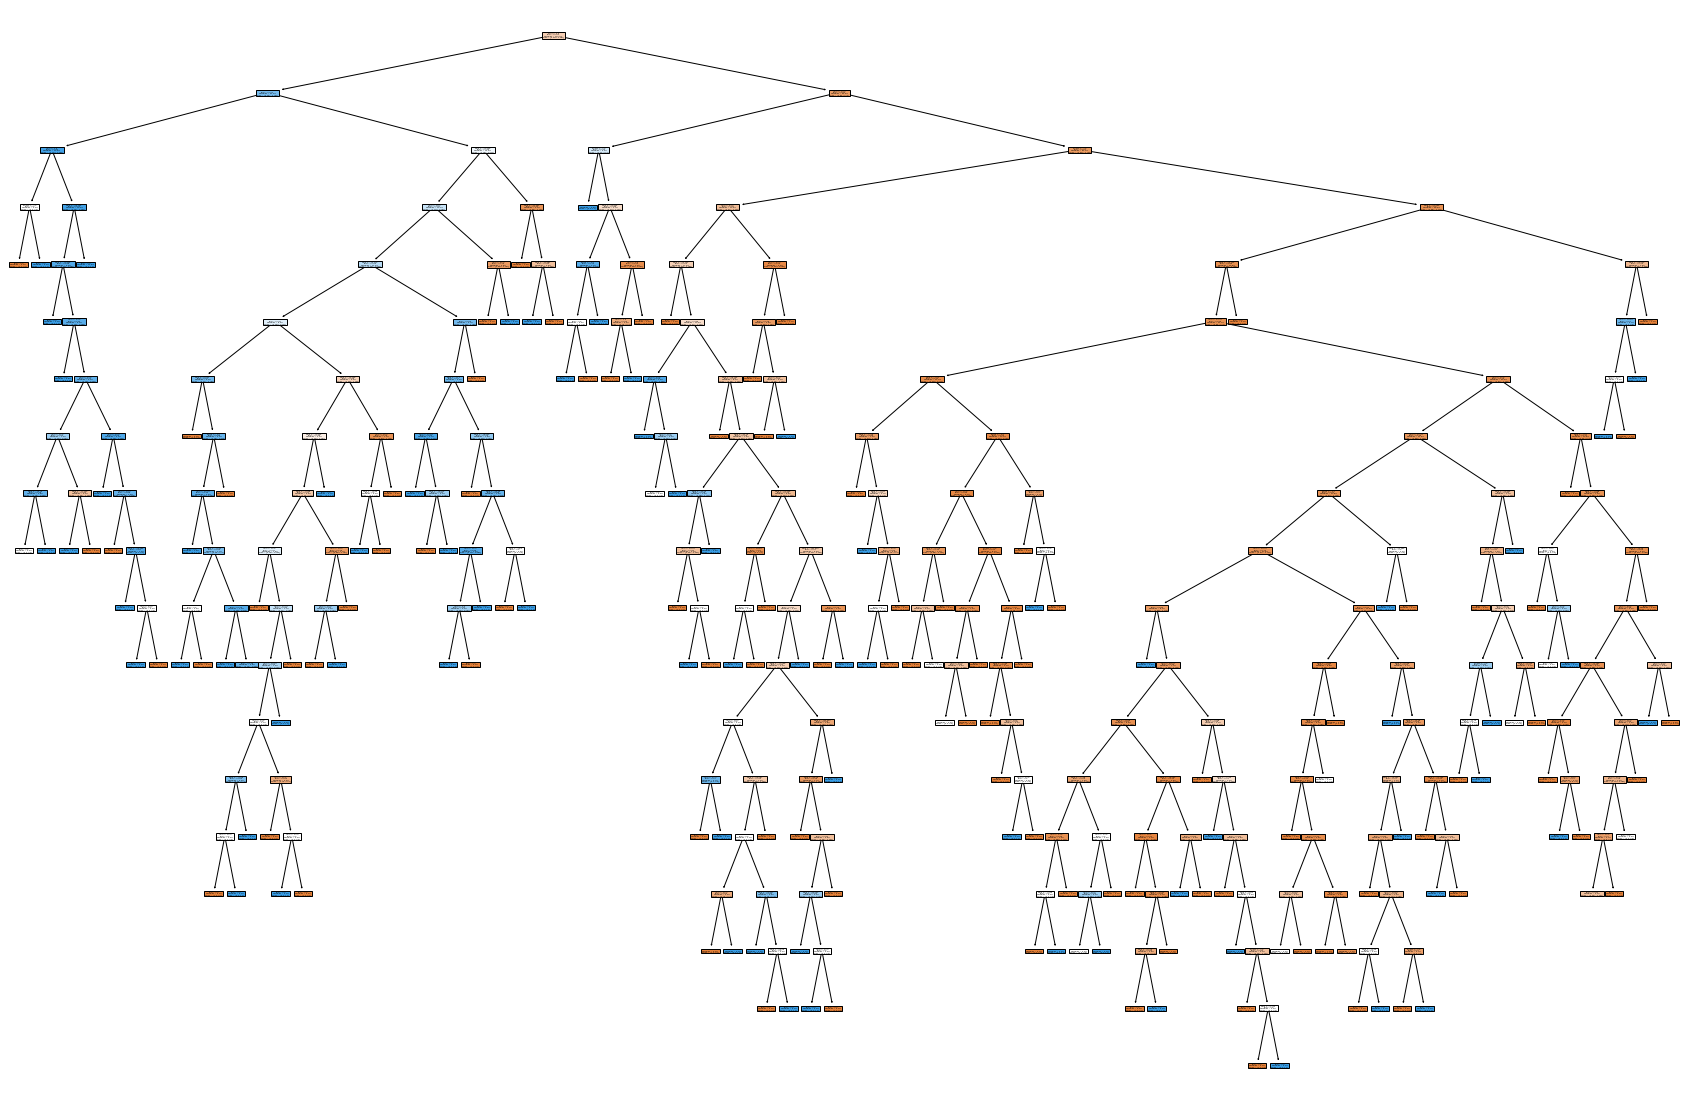

In [41]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30,20))
plot_tree (tree_decision,filled=True,feature_names=x.columns,proportion=True)

In [42]:
tree_decision = tree.DecisionTreeClassifier(criterion="gini",splitter='best',max_leaf_nodes=5)  
tree_decision.fit(x_train, y_train)   #fitting our model
y_pred=tree_decision.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7430167597765364


In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
random_grid = {'n_estimators': n_estimators,}
param_grid = {
    
    'n_estimators': [100, 200, 300, 1000]
}


In [24]:
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(x_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    6.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    6.6s finished
a:\python37\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


ValueError: could not convert string to float: 'Yes'

In [44]:
clf=RandomForestClassifier(n_estimators=100)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", accuracy_score(y_test, y_pred)) 

a:\python37\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy: 0.8435754189944135


In [ ]:

from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics  # Importing metrics to test accuracy

X=data[['sepal length', 'sepal width', 'petal length', 'petal width']] #features
y=data['species']  #target
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.3) #splitting data with test size of 30%